In [3]:
import os
from torchvision import transforms
import torch
import shutil
from torch.utils.data import Dataset as BaseDataset
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random
import numpy as np

In [3]:
augmentations = transforms.Compose([transforms.RandomResizedCrop(size=(256, 256))])
                                    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
                                    #transforms.RandomCrop(size=(224, 224), pad_if_needed=True)])

In [4]:
# # ------------ Create Dataloader ------------    
# class Dataset(BaseDataset):
#     def __init__( self, images_dir, transforms=None):
#         self.ids = os.listdir(images_dir)
#         self.images_fps = [ os.path.join(images_dir, image_id) for image_id in self.ids]
#         self.transforms = transforms
        
#     def __getitem__(self, i):
#         # read data
#         image = Image.open(self.images_fps[i])

#         if self.transforms:
#             image = self.transforms(image)
        
#         # # print(self.ids[i]) 
#         # idk = image.save(f'.\\output\\{self.ids[i]}')

#         return image
    
#     def __len__(self):
#         return len(self.ids)

In [10]:
# move images to be augmented into designated folder

valid_path = '.\\7.24_dataset_NOSPLIT\\7.24_valid\\'
invalid_path = '.\\7.24_dataset_NOSPLIT\\7.24_invalid\\'

difference = len(os.listdir(valid_path)) - len(os.listdir(invalid_path))
print(difference)

for valid_file in os.listdir(valid_path)[:difference+1]:
    shutil.copy(os.path.join(valid_path, valid_file), f'.\\for_augmentation\\{valid_file}')

1765


In [35]:
file_path = '.\\to_augment\\'

file_list = os.listdir(file_path)

for img_file in file_list[490:981]:
    img = Image.open(os.path.join(file_path, img_file))
    w, h = img.size
    result = Image.new(img.mode, (w, h), (0, 0, 0))

    # rgb_img = img.crop((round(img.size[0]*0.5), 0, w, img.size[1]))
    rgb_img = img.crop((0, 0, round(img.size[0]*0.5), img.size[1]))
    result.paste(rgb_img, (round(img.size[0]*0.5), 0))
    # draw = ImageDraw.Draw(img)

    # # x1 = random.randint(0, img.size[0])
    # # y1 = random.randint(0, img.size[1])

    # # draw.circle((x1, y1), radius=random.randint(round(0.35*img.size[1]), round(0.50*img.size[1])), fill = 'black', outline ='black')
    
    # x1 = random.randint(round(img.size[0]*0.25), round(img.size[0]*.75))
    # y1 = random.randint(round(img.size[1]*0.25), round(img.size[1]*.75))

    # draw.circle((x1, y1), radius=random.randint(round(0.10*img.size[1]), round(0.25*img.size[1])), fill = 'black', outline ='black')
    result = result.save(f'.\\cityscapes_augmented\\{img_file}')
    

66 146


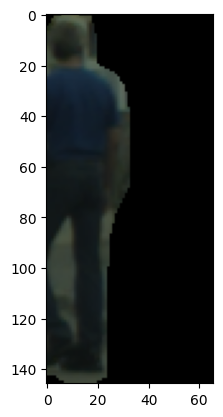

In [31]:
img = Image.open(os.path.join(file_path,file_list[random.randint(0, len(file_list))]))
w, h = img.size
print(w, h)
# draw = ImageDraw.Draw(img)

# x1 = random.randint(round(img.size[0]*0.2), round(img.size[0]*0.65))
# y1 = random.randint(round(img.size[1]*0.2), round(img.size[1]*0.65))
# print(y1)

# vertical = [(x1, 0), (x1+(random.randint(round(img.size[0]*0.05), round(img.size[0]*0.30))), img.size[1])]
# horizontal = [(0, y1), (img.size[1], y1+(random.randint(0, round(img.size[1]*0.35))))]

# draw.rectangle(xy=vertical, fill='black', width=1, outline ='black')

# x1 = random.randint(round(img.size[0]*0.25), round(img.size[0]*.75))
# y1 = random.randint(round(img.size[1]*0.25), round(img.size[1]*.75))

result = Image.new(img.mode, (w, h), (0, 0, 0))
rgb_img = img.crop((round(img.size[0]*0.5), 0, w, img.size[1]))

result.paste(rgb_img, (0, 0))
    
plt.imshow(result)
plt.show()

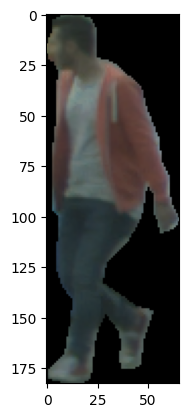

In [15]:
plt.imshow(img)
plt.show()

In [207]:
idk = img.save('cityscapes_augmented\\hanover_000000_027481_1.png')

In [45]:
file_path = '.\\7.24_augmented_NOSPLIT\\'

file_list = os.listdir(file_path)


# print(len(file_list))
# print(round(len(file_list)*.7))
for f in range(len(file_list)):
    src_path = os.path.join(file_path, file_list[f])
    dst_path = f'.\\7.24_dataset_FINAL\\invalid\\test\\{file_list[f]}'
    shutil.move(src_path, dst_path)